* Feature dengan Scaling.
* Target tanpa Scaling

## Library

In [1]:
# import necessary module

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import concatenate
from keras.layers import Dense, Input, Dropout

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

## Model Biasa

In [2]:
def model(n_input, n_target):
    """
    Fungsi untuk membuat model
    
    arguments:
        n_input = jumlah feature dari data input
        n_outut = jumlah target
        
    return:
        model
    """
    # initializer 
    initializer = tf.keras.initializers.GlorotUniform(seed=None)
    mse = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
    aktivasi = "relu"

    # input layer
    visible = Input(shape=(n_input))
    
    # branch 1
    x1 = Dense(100, kernel_initializer = initializer, activation = aktivasi)(visible)
    x1 = Dense(75, kernel_initializer = initializer, activation = aktivasi)(x1)
    x1 = Dense(50, kernel_initializer = initializer, activation = aktivasi)(x1)
    x1 = Dense(n_target, kernel_initializer = initializer, activation = "tanh")(x1)    

    # model
    model = Model(inputs = visible, 
                  outputs = x1)
    
    #compile model
    model.compile(loss = mse,
                  optimizer = 'nadam')
    
    return model

## Data

In [3]:
# input data

feature = pd.read_csv("coef_fourier_kolom.csv")
feature.sample(5)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
3246,-2.561005,-2.971074,-2.435338,-2.549678,-2.489632,-2.579665,-2.254351,-1.839729,0.545655,0.512827,...,-2.683741,-2.955202,-2.2466,-2.327488,-2.695364,-2.493247,-1.815158,-1.797519,0.416477,1.127652
533,-2.564005,-2.974074,-2.448338,-2.562678,-2.565632,-2.655665,-2.707351,-2.292729,-2.167345,-2.200173,...,-2.686741,-2.958202,-2.2596,-2.340488,-2.771364,-2.569247,-2.268158,-2.250519,-2.296523,-1.585348
1818,-2.563005,-2.973074,-2.442338,-2.556678,-2.529632,-2.619665,-2.492351,-2.077729,-0.882345,-0.915173,...,-2.685741,-2.957202,-2.2536,-2.334488,-2.735364,-2.533247,-2.053158,-2.035519,-1.011523,-0.300348
5108,-2.560005,-2.970074,-2.427338,-2.541678,-2.438632,-2.528665,-1.944351,-1.529729,2.407655,2.374827,...,-2.682741,-2.954202,-2.2386,-2.319488,-2.644364,-2.442247,-1.505158,-1.487519,2.278477,2.989652
5174,-2.560005,-2.970074,-2.427338,-2.541678,-2.436632,-2.526665,-1.933351,-1.518729,2.473655,2.440827,...,-2.682741,-2.954202,-2.2386,-2.319488,-2.642364,-2.440247,-1.494158,-1.476519,2.344477,3.055652


In [4]:
# target data

target = pd.read_csv("coef_ekspansi.csv")
target.sample(5)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
2481,-0.017856,-0.033860,-0.045817,-0.052499,-0.054269,-0.051147,-0.044202,-0.034506,-0.023607,-0.012625,...,-0.030562,-0.057971,-0.078444,-0.089875,-0.092889,-0.087554,-0.075680,-0.059092,-0.040409,-0.021523
2451,-0.017774,-0.033719,-0.045663,-0.052365,-0.054198,-0.051162,-0.044318,-0.034714,-0.023881,-0.012911,...,-0.030425,-0.057740,-0.078195,-0.089661,-0.092784,-0.087596,-0.075892,-0.059460,-0.040889,-0.022022
2730,-0.018631,-0.035130,-0.047171,-0.053660,-0.054848,-0.050949,-0.043103,-0.032598,-0.021120,-0.010052,...,-0.031847,-0.060060,-0.080638,-0.091719,-0.093740,-0.087086,-0.073685,-0.055724,-0.036062,-0.017063
2503,-0.017919,-0.033966,-0.045932,-0.052600,-0.054321,-0.051135,-0.044114,-0.034350,-0.023401,-0.012409,...,-0.030665,-0.058145,-0.078630,-0.090034,-0.092966,-0.087521,-0.075518,-0.058814,-0.040047,-0.021148
4716,-0.030001,-0.048556,-0.057995,-0.060036,-0.053158,-0.040089,-0.022499,-0.003769,0.012865,0.021356,...,-0.051196,-0.082726,-0.098644,-0.102071,-0.090440,-0.068264,-0.038291,-0.006210,0.022355,0.036792


## Data Splitting

In [5]:
instances_1, feature_dim = feature.shape
instances_2, target_dim = target.shape

In [6]:
# split training and testing
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 7)

## Scaling

In [7]:
# define scaler
scaler = StandardScaler()

# fit on the training dataset
scaler.fit(X_train)

# scale the training set
X_train = scaler.transform(X_train)

# scale the test dataset
X_test = scaler.transform(X_test)

## Training

In [8]:
# model 

model = model(feature_dim, target_dim)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 50)                3800      
                                                                 
 dense_3 (Dense)             (None, 100)               5100      
                                                                 
Total params: 26,575
Trainable params: 26,575
Non-trainable params: 0
_________________________________________________________________


In [10]:
# training 
history = model.fit(
    x = X_train, 
    y = y_train, 
    batch_size = 8, 
    shuffle = True, 
    validation_data = (X_test, y_test), 
    epochs = 250
)

Epoch 1/250
540/540 [==============================] - 2s 2ms/step - loss: 0.0094 - val_loss: 0.0078
Epoch 2/250
540/540 [==============================] - 1s 1ms/step - loss: 0.0077 - val_loss: 0.0073
Epoch 3/250
540/540 [==============================] - 1s 1ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 4/250
540/540 [==============================] - 1s 1ms/step - loss: 0.0074 - val_loss: 0.0079
Epoch 5/250
540/540 [==============================] - 1s 1ms/step - loss: 0.0076 - val_loss: 0.0070
Epoch 6/250
540/540 [==============================] - 1s 1ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 7/250
540/540 [==============================] - 1s 1ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 8/250
540/540 [==============================] - 1s 1ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 9/250
540/540 [==============================] - 1s 1ms/step - loss: 0.0066 - val_loss: 0.0072
Epoch 10/250
540/540 [==============================] - 1s 1ms/step - loss: 0.0065 - val_lo

540/540 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 82/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 83/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 84/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 85/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 86/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 87/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 88/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 89/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 90/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 

Epoch 161/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 162/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0056
Epoch 163/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 164/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 165/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 166/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0050
Epoch 167/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 168/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 169/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 170/250
540/540 [==============================] - 1s 2ms/step - lo

540/540 [==============================] - 1s 2ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 241/250
540/540 [==============================] - 1s 3ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 242/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 243/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 244/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 245/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 246/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 247/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 248/250
540/540 [==============================] - 1s 3ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 249/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0043 - v

## Visualisasi

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']

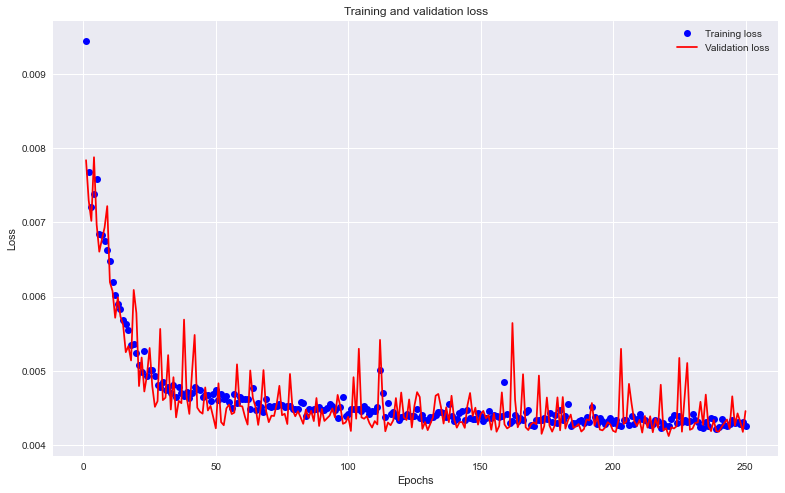

In [12]:
epochs = range(1, len(loss) + 1)
plt.figure(figsize = (13, 8))
plt.style.use("seaborn")

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Prediction

In [13]:
# prediksi
prediction = model.predict(X_test)

34/34 [==============================] - 0s 2ms/step


In [14]:
prediksi = prediction.flatten()
real = y_test.to_numpy().flatten()

In [15]:
df = {"predict": prediksi, "real": real}
pd.DataFrame(df)

,predict,real
0,0.010577,-0.032400
1,0.018350,-0.050352
2,0.022388,-0.058402
3,0.023679,-0.059045
4,0.022037,-0.050413
...,...,...
107995,-0.085691,-0.087051
107996,-0.073139,-0.073553
107997,-0.056426,-0.055506
107998,-0.038731,-0.035783


In [16]:
from sklearn.metrics import r2_score
r2_score(real, prediksi)

0.5225176760055417

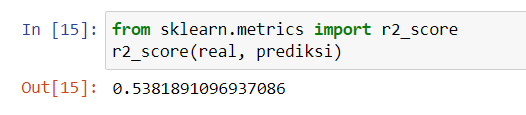

# ------------------------------------------------------------------------------------------------